<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Расчет-параметров" data-toc-modified-id="Расчет-параметров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Расчет параметров</a></span></li><li><span><a href="#Расчет-времени" data-toc-modified-id="Расчет-времени-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Расчет времени</a></span></li><li><span><a href="#Обработка-редких-значений" data-toc-modified-id="Обработка-редких-значений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обработка редких значений</a></span></li><li><span><a href="#Факторы-стоимости-квартир" data-toc-modified-id="Факторы-стоимости-квартир-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Факторы стоимости квартир</a></span></li><li><span><a href="#Обработка-населенных-пунктов" data-toc-modified-id="Обработка-населенных-пунктов-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Обработка населенных пунктов</a></span></li><li><span><a href="#Обработка-цнтра-Питера" data-toc-modified-id="Обработка-цнтра-Питера-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Обработка цнтра Питера</a></span></li><li><span><a href="#Ценообразование-в-центре-Питера" data-toc-modified-id="Ценообразование-в-центре-Питера-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Ценообразование в центре Питера</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

Нужно определить рыночную стоимость объектов недвижимости. Задача — установить параметры, которые позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Изучение данных из файла

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import display
import warnings  
warnings.filterwarnings('ignore')

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
display(df.head(10))  
df.info() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Рассмотрим полученную информацию более подробно:

Разделителем столбцов файла был символ табуляции, для приведения таблицы в более читаемый вид используем замену разделителя. 

Таблица содержит 22 столбца, в которых встречаются данные типа int64, float64 и object:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения.

**Вывод:**

В таблице много пропусков, природа которых пока не совсем ясна: пропуск может означать, что информация отсутствует, или что просто этого значения нет на объекте, например, балкона и информация о нем обозначена как NaN. Для установления зависимости между ценой и остальными параметрами ключевую роль играют данные о конечной цене недвижимости на момент снятия публикации, именно эту информацию и будем брать за основу. 

## Предобработка данных

Так как столбцов очень много и почти каждый требует предобработки, будем рассматривать их отдельно. 

*total_images*, *floor* и *total_area* - одни из немногих, кому не требуется правка, так как содержат данные правильного типа без пропусков. А вот в *last_price* цены указаны в рублях, переведем значения в миллионы для наглядной визуализации на графиках в дальнейшем, но перед этим избавимся от копеек, которые не несут в себе никакой смысловой нагрузки. 

In [2]:
df['last_price'] = df['last_price'].astype('int')
df['last_price'] = df['last_price'] / 1000000

*first_day_exposition* передается в качестве строковых данных, для успешного анализа переведем значения в столбце в формат даты.

In [3]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

*ceiling_height* содержит довольно много пропусков, быть может продавец квартиры просто не знает высоту потолка на объекте. Высокие потолки - большое приемущество, скорее всего информация о них присутствует, а какие то типичные значения пропущенны, заполним пропуски медианным значением, потому что, в основном, в современных домах высота потолков одинаковая. Но сначала проверим нет ли выбросов: посмотрим минимальное и максимальное значение высоты:

In [4]:
print(df['ceiling_height'].min())
print(df['ceiling_height'].max())
df['ceiling_height'].median()

1.0
100.0


2.65

Так как в задаче рассматриваются не только жилые квартиры, но и вся недвижимость в целом, то высота потолка 1 метр допустима: например, чердачное помещение; 100 метров, в целом тоже: например, склад или заводское помещение. Медианное значение равно 2,65 м - самое что ни на есть идеальное значение для заполнения пропусков, потому что в основном именно такая высота потолков в среднестатистическом доме.

In [5]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

*living_area* и *kitchen_area*: можно примерно расчитать сколько будут занимать процентов от общей площади, допустим, что в среднем кухня занимает 20% от общей площади, а жилое протранство 70%, остальное - сан. узлы, балконы, хоз. пространства. 

In [6]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * 0.7)
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * 0.2)

*studio*, *open_plan*, *is_apartment* предполагают собой булевы массивы, в случае *is_apartment* False - не апартаменты, а True - апартаменты, пока не очень ясно, что вообще находится в этом столбце, ведь тип данных object. Проверим содержимое стобца методом unique()

In [7]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Скорее всего в данном случае NaN представляет собой False, то есть то, что данная недвижимость не является апартаментами, исправим это. 

In [8]:
df['is_apartment'] = df['is_apartment'].fillna(False)

*locality_name* - один из ключевых факторов ценообразования квартир. Ведь жить в области или в ее центральном городе - разница большая, а так как тут всего 0,2% пропущенных значений, просто избавимся от этих пропусков.

In [9]:
df = df.dropna(subset = ['locality_name'])

Для заполнения пропусков столбцов *cityCenters_nearest*, *airports_nearest*, *parks_nearest* и *ponds_nearest* сделаем лемматизацию: заполним пропуски среднем отдельно для каждой категории: деревня, поселок, товарищество, село, маленький город и Санкт-Петербург. А также включим сюда еще и столбец *floors_total*

In [10]:
df = df.reset_index(drop = True)
df['locality_group'] = 'маленький город'

from pymystem3 import Mystem 
m = Mystem()
lemmas = []  
for i in range(len(df['locality_name'])) :  
    lemmas = m.lemmatize(df['locality_name'][i])  
    for j in range(len(lemmas)):  
        if lemmas[j] == 'поселок' :
            df['locality_group'][i] = df['locality_group'][i].replace(df['locality_group'][i], 'посёлок')
        if lemmas[j] == 'деревня' :
            df['locality_group'][i] = df['locality_group'][i].replace(df['locality_group'][i], 'деревня')
        if lemmas[j] == 'санкт-петербург' :
            df['locality_group'][i] = df['locality_group'][i].replace(df['locality_group'][i], 'санкт-петербург')
        if lemmas[j] == 'село' :
            df['locality_group'][i] = df['locality_group'][i].replace(df['locality_group'][i], 'село')
        if lemmas[j] == 'товарищество' :
            df['locality_group'][i] = df['locality_group'][i].replace(df['locality_group'][i], 'товарищество')
            
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_group
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,санкт-петербург
1,7,3.350,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,посёлок
2,10,5.196,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,санкт-петербург
3,0,64.900,159.00,2015-07-24,3,2.65,14.0,111.30,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,санкт-петербург
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,санкт-петербург
5,10,2.890,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,посёлок
6,6,3.700,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,посёлок
7,5,7.915,71.60,2019-04-18,2,2.65,24.0,50.12,22,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,санкт-петербург
8,20,2.900,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,посёлок
9,18,5.400,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,санкт-петербург


In [11]:
columns = ['parks_nearest', 'ponds_nearest', 'cityCenters_nearest', 'airports_nearest', 'floors_total']

for i in columns:
    df[i] = df[i].fillna(df.groupby(['locality_group'])[i].transform('mean'))

Проще воспринимать расстояние в киллометрах, поэтому переведем значения столбцов *cityCenters_nearest*, *airports_nearest*, *parks_nearest* и *ponds_nearest* 

In [12]:
columns2 = ['parks_nearest', 'ponds_nearest', 'cityCenters_nearest', 'airports_nearest']
for i in columns2:
    df[i] = df[i] / 1000

balcony - количество балконов, здесь скорее всего NaN просто демонстрирует его отсутствие, внесем это в таблицу. 

Пропуски в *parks_around3000* и *ponds_around3000* так же могут свидетельствовать о том, что ни парков, ни прудов нет, заменим эти данные нулем.

In [13]:
columns2 = ['balcony', 'parks_around3000', 'ponds_around3000']

for i in columns2:
    df[i] = df[i].fillna(0)

*days_exposition* можно заменить на медианное значение

In [14]:
print(df['days_exposition'].max())
print(df['days_exposition'].min())

1580.0
1.0


от 1 дня до 4 лет: в целом вполне себе возможная ситуация. Можно приступать к замене:

In [15]:
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())

А теперь приведем все оставшиеся значения к должному виду:

In [16]:
df = df.astype({"balcony": "int64",
                "floors_total": "int64", 
                "days_exposition": "int64", 
                "parks_around3000": "int64", 
                "ponds_around3000": "int64"})

Проверим выполненную работу:

In [17]:
print(df.isnull().sum())
print('******************')
df.info()

total_images              0
last_price                0
total_area                0
first_day_exposition      0
rooms                     0
ceiling_height            0
floors_total              0
living_area               0
floor                     0
is_apartment              0
studio                    0
open_plan                 0
kitchen_area              0
balcony                   0
locality_name             0
airports_nearest        950
cityCenters_nearest     950
parks_around3000          0
parks_nearest           950
ponds_around3000          0
ponds_nearest           950
days_exposition           0
locality_group            0
dtype: int64
******************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 23 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                 

Так как по прежнему остались пропуски в столбцах, попробуем другой метод для их заполнения:

In [18]:
def mean(row) :  
    location = row['locality_group']
     
    if location == 'санкт-петербург' :
        return 0
    if location == 'маленький город' :
        return 1
    if location == 'посёлок' :
        return 2
    if location == 'деревня' :
        return 3
    if location == 'село' :
        return 4
    if location == 'товарищество' :
        return 5

df['mean_groups'] = df.apply(mean, axis=1)  

for i in range (6) :  
    total_len = df[df['mean_groups'] == i]['airports_nearest'].mean()
    df['airports_nearest'] = df['airports_nearest'].fillna(total_len) 
    
for i in range (6) :  
    total_len = df[df['mean_groups'] == i]['cityCenters_nearest'].mean()
    df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(total_len) 
    
for i in range (6) :  
    total_len = df[df['mean_groups'] == i]['parks_nearest'].mean()
    df['parks_nearest'] = df['parks_nearest'].fillna(total_len) 
    
for i in range (6) :  
    total_len = df[df['mean_groups'] == i]['ponds_nearest'].mean()
    df['ponds_nearest'] = df['ponds_nearest'].fillna(total_len) 

Повторим проверку:

In [19]:
print(df.isnull().sum())
print('******************')
df.info()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
locality_group          0
mean_groups             0
dtype: int64
******************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 24 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int

Все работает верно: теперь каждый столбец правильного типа, пропуски отсутствуют.

Проверим таблицу на наличие дубоикатов:

In [20]:
df.duplicated().sum()

0

 Дубликаты отсутствуют.
 
 **Вывод:**
 
 Таблица содержала большое количество пропусков: какие то из них были критичны, какие то нет, в любом случае по итогу предобработки данные готовы к анализу.

## Расчёты и добавление результатов в таблицу

Рассчитаем цену за квадратный метр: для этого создадим столбец *price_per_meter*, куда будем помещать данные

In [21]:
df['price_per_meter'] = df['last_price'] / df['total_area']

Рассчитаем день недели, месяц и год публикации объявления: создадим три соответствующих столбца *publication_weekday*, *publication_month* и *publication_year*.

In [22]:
df['publication_weekday'] = df['first_day_exposition'].dt.weekday
df['publication_year'] = df['first_day_exposition'].dt.year
df['publication_month'] = df['first_day_exposition'].dt.month

Категоризируем этаж квартиры. Варианты: 1 - первый, 2 - последний или 0 - другой. Создадим столбец *floor_type*

In [23]:
def floor_t(row) :  
    floor = row['floor']
    floor_max = row['floors_total']
    
    if floor == 1 :
        return 1
    if (floor != 1) and (floor != floor_max) :
        return 0
    if floor == floor_max:
        return 2

df['floor_type'] = df.apply(floor_t, axis=1)

Посчитаем соотношение жилой площади к общей, а также кухонной к общей. Создадим столбцы *living_to_total* и *kitchen_to_total* для этих данных.

In [24]:
df['living_to_total'] = df['living_area'] / df['total_area']
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']

## Исследовательский анализ данных

### Расчет параметров

Рассмотрим каждый параметр отдельно: для площади, цены, числа комнат и высоты потолков построим гистограммы для детальной визуализации данных.

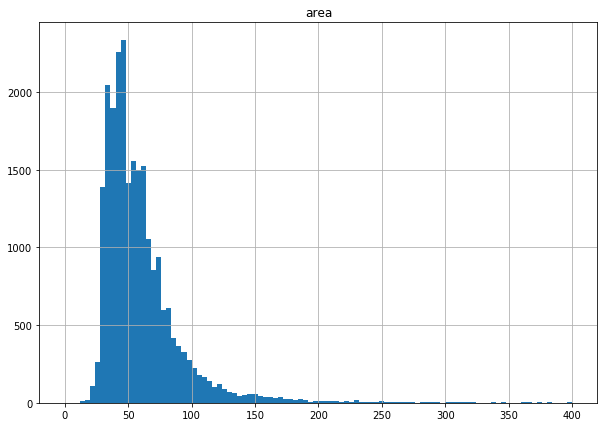

In [25]:
df['total_area'].hist(bins = 100, range=(0,400), figsize=(10,7))
plt.title('area')
plt.show()

В целом ожидаемый график: резкий пик у 50 метров квадратных и плавный спуск далее, это свидетельствует о том, что больше всего объявлений о продаже однокомнатной - двухкомнатной квартир. 

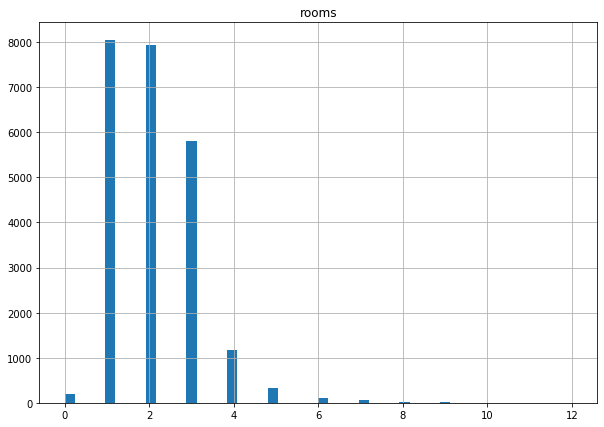

In [26]:
df['rooms'].hist(bins=50, range=(0,12), figsize=(10,7))
plt.title('rooms')
plt.show()

Как и график о распределении частот площади, количество комнат также свидетельствует о том, что в оснавном продаются однокомнатные - двухкомнатные квартиры, однако трешки также встречаются довольно часто. 

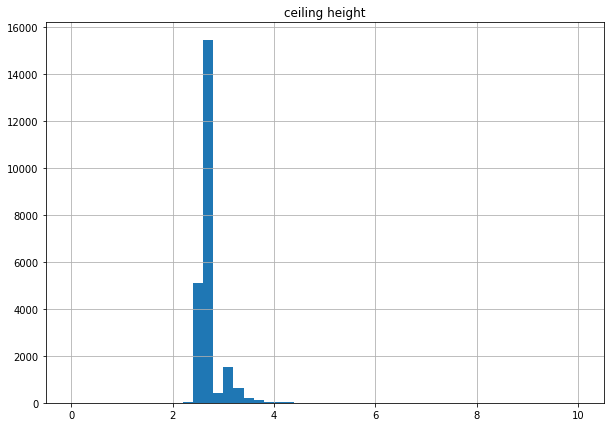

In [27]:
df['ceiling_height'].hist(bins=50, range=(0,10), figsize=(10,7))
plt.title('ceiling height')
plt.show()

Сегодня минимальной нормой в России считается высота потока равная 2,4 метра, о чем и свидетельствует график: в основном мы и имеем это значение.  

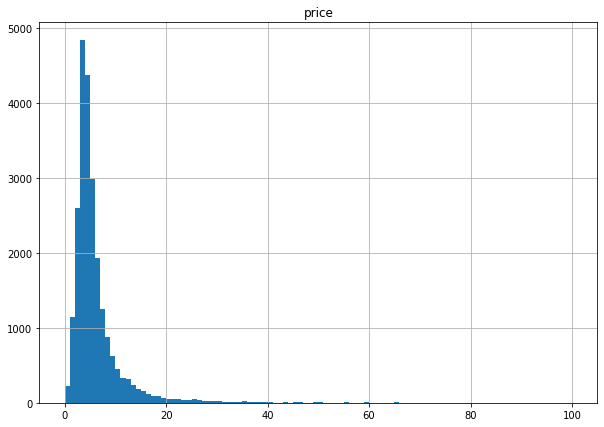

In [28]:
df['last_price'].hist(bins=100, range=(0,100), figsize=(10,7))
plt.title('price')
plt.show()

Наблюдается резкий пик на 5-7 миллионах, а дальше - плавный спуск. В полне реалистичная картина ценообразования в Санкт-Петербурге, потому что средняя стоимость однушки в Санкт-Петербурге как раз и составляет примерно такую цену, а так как у нас не только Петербург, но и Лен. область, легко оюъясняется, почему на графике комнат всплеск еще и на отметке "2", потому что это как раз и будет средней ценой за двушку.  

### Расчет времени

Рассмотрим время прдажи квартирты:  

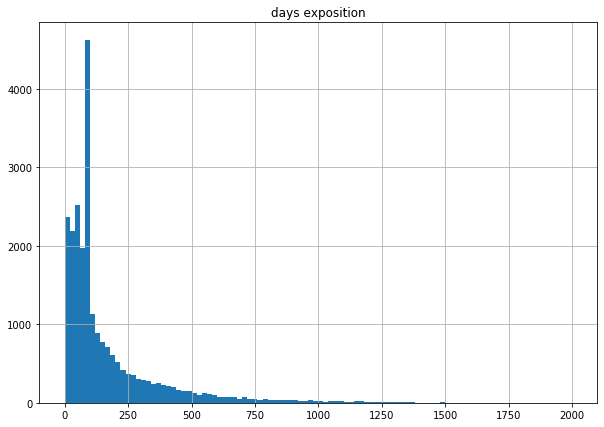

In [29]:
df['days_exposition'].hist(bins=100, range=(0,2000), figsize=(10,7))
plt.title('days exposition')
plt.show()

Наблюдается резкий пик в значении 100 дней: вполне возможная ситуация. Для достоверности результата найдем еще среднее и медиану. 

In [30]:
print(df['days_exposition'].median())
print(df['days_exposition'].mean())

95.0
169.22274841437633


Обращаясь к гистограмме, можно заметить, что на отметке 750 дней уже почти нет данных, а на 1000 они вообще едва заметны, тогда можно работать только со срезом данных, где дней будет не больше 850, остольное можно считать необычайно долгими продажами. 

In [31]:
df_not_too_slow = df.query('days_exposition < 850')

Подозрительно быстрых продаж гораздо больше, чем долгих, посчитаем от какого процента от общих данных мы избавимся, если удалим эти значения (примим за сверхбыструю продажу месяц):

In [32]:
len(df.query('days_exposition < 30')) / len(df)

0.14904862579281183

В целом 15% не так уж и много, поэтому можно отбросить эти данные. 

In [33]:
df_not_too_fast = df.query('days_exposition > 30')

Сравним полученные данные с исходными. Построим два графика ящик с усами: для новых значений и старых.

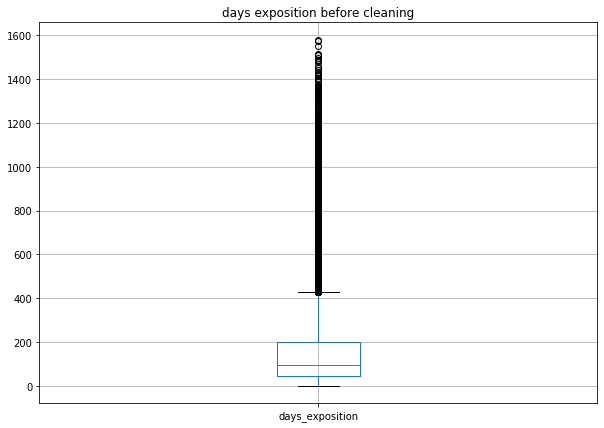

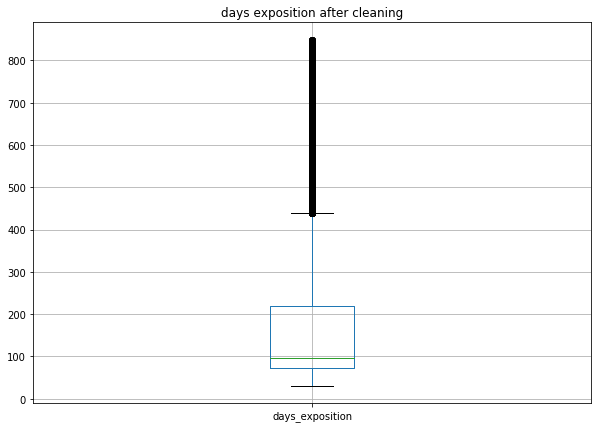

In [34]:
df.boxplot(column='days_exposition', figsize=(10,7))
plt.title('days exposition before cleaning')
plt.show()

df_good = df.query('30 < days_exposition < 850')
df_good.boxplot(column='days_exposition', figsize=(10,7))
plt.title('days exposition after cleaning')
plt.show()

На графике видно, что доля нормальных значений выросла, минимум, как и максимум увеличился, т.е. данные приняли более реалистичный вид. 

### Обработка редких значений

Мы уже рассматривали столбцы с наиболее важными значениями для анализа: *last_price*, *total_area*, *rooms* и *ceiling_height*. Полученнные гистограммы свидетельствовали о наличии выбросов. Для цен: что то выше 40 млн считается редкостью, площадь больше 300 метров квадратных тоже, у комнат больше восьми значения дальше почти не встречаются, потолки выше 4 метров - редкость. Посмотрим конкретное число этих данныз:

In [35]:
df1 = df.query('last_price > 40')
df2 = df.query('total_area > 300')
df3 = df.query('rooms > 8')
df4 = df.query('ceiling_height > 4')
print(df1.shape[0])
print(df2.shape[0])
print(df3.shape[0])
print(df4.shape[0])

182
61
19
75


Этих данных ничтожно мало, смело от них избавляемся. 

In [36]:
df_clean = df.query('last_price < 40 and total_area < 300 and rooms < 8 and ceiling_height < 4')

В итоге получена таблица без выбросов и выбивающихся значений, они могли появиться в результате продажи не квартиры, а какого то другого помещения, так как нас интересуют только квартиры, эти данные нам не нужны. 

### Факторы стоимости квартир

Самое время узнать: что влияет на цену квартиры, для этого построим матрицы корреляции для отдельных параметров: площади, числа комнат и удаленности от центра. 

                     cityCenters_nearest  last_price     rooms  total_area
cityCenters_nearest             1.000000   -0.422544 -0.147997   -0.238440
last_price                     -0.422544    1.000000  0.503333    0.785360
rooms                          -0.147997    0.503333  1.000000    0.789583
total_area                     -0.238440    0.785360  0.789583    1.000000


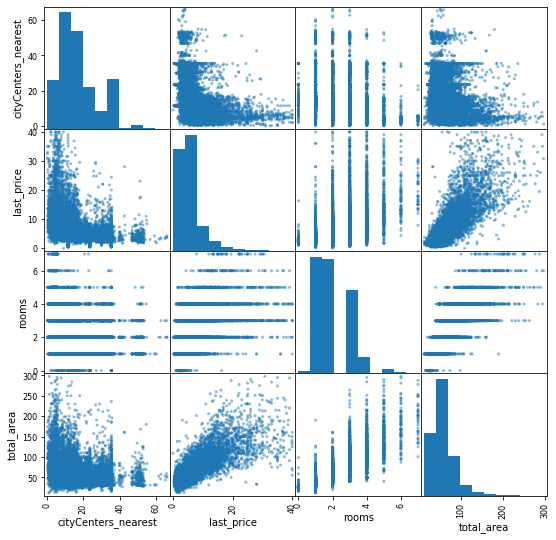

In [37]:
stat_multi = df_clean.pivot_table(
    index = df_clean.index, values=['cityCenters_nearest', 'last_price', 'total_area', 'rooms']
)
print(stat_multi.corr())
pd.plotting.scatter_matrix(stat_multi, figsize=(9, 9))
plt.show()

Получается, что наибольшая зависимость наблюдается между столбцами: *last_price* и *total_area*, *total_area* и *rooms*, тогда по свойству транзетивности связь наблюдается и между *last_price* и *rooms*, также наблюдается отрицательная зависимость между *last_price* и *cityCenters_nearest*, которая гласит: чем меньше расстояние до центра, тем дороже квартиры. Полученные графики и коэффициенты корреляции вполне ожидаемые. 

Изучим влияет ли этаж на цену квартиры: 

            floor_type  last_price
floor_type    1.000000   -0.067034
last_price   -0.067034    1.000000


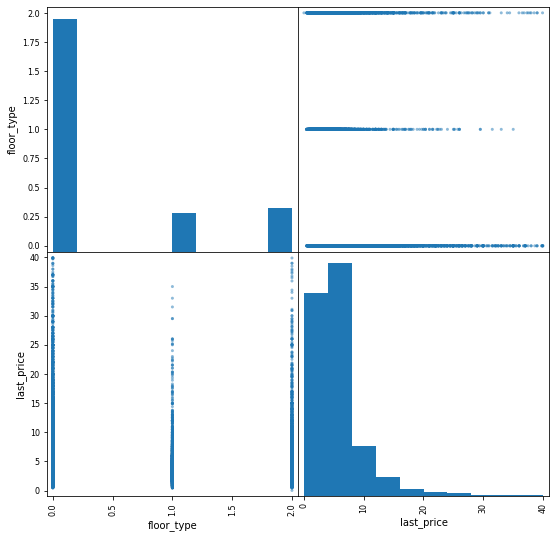

In [38]:
stat_floor = df_clean.pivot_table(
    index = df_clean.index, values=['last_price', 'floor_type']
)
print(stat_floor.corr())
pd.plotting.scatter_matrix(stat_floor, figsize=(9, 9))
plt.show()

Как показал коэффициент корреляции, значения не зависят друг от друга.

Посмотрим: влияет ли как нибудь на цену дата размещения объявления.

                     last_price  publication_month  publication_weekday  \
last_price             1.000000           0.004766            -0.011213   
publication_month      0.004766           1.000000             0.011522   
publication_weekday   -0.011213           0.011522             1.000000   
publication_year      -0.036329          -0.271480            -0.003196   

                     publication_year  
last_price                  -0.036329  
publication_month           -0.271480  
publication_weekday         -0.003196  
publication_year             1.000000  


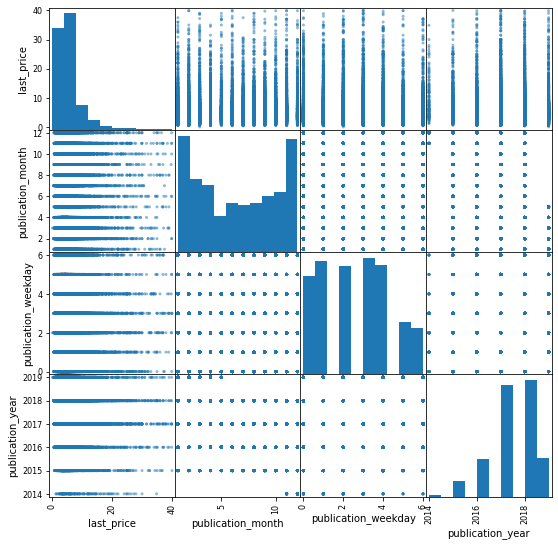

In [39]:
stat_post = df_clean.pivot_table(
    index = df_clean.index, values=['last_price', 'publication_weekday', 'publication_year', 'publication_month']
)
print(stat_post.corr())
pd.plotting.scatter_matrix(stat_post, figsize=(9, 9))
plt.show()

Дата публикации не влияет на цену объекта. 

### Обработка населенных пунктов

Выделим топ 10 самых частовстречающихся населенных пункта:

In [40]:
df_clean['locality_name'].value_counts().head(10)

Санкт-Петербург      15422
посёлок Мурино         520
посёлок Шушары         440
Всеволожск             396
Пушкин                 365
Колпино                337
посёлок Парголово      327
Гатчина                305
деревня Кудрово        299
Выборг                 235
Name: locality_name, dtype: int64

Найдем среднее значение цены за квадратный метр для каждого города отдельно:

In [41]:
df_clean = df_clean.reset_index()
def locality_mean(local) :
    
    total_area = 0
    total_price = 0
    
    for i in range(len(df_clean)) :
        if df_clean['locality_name'][i] == local:
            total_area += df_clean['total_area'][i]
            total_price += df_clean['last_price'][i]
    return total_price / total_area * 1000000

print('Средняя цена(тыс) квадратного метра в Санкт-Петербурге: {:.2f}'.format(locality_mean('Санкт-Петербург'))) 
print('Средняя цена(тыс) квадратного метра в посёлоке Мурино: {:.2f}'.format(locality_mean('посёлок Мурино'))) 
print('Средняя цена(тыс) квадратного метра в посёлоке Шушары: {:.2f}'.format(locality_mean('посёлок Шушары'))) 
print('Средняя цена(тыс) квадратного метра во Всеволожске: {:.2f}'.format(locality_mean('Всеволожск'))) 
print('Средняя цена(тыс) квадратного метра в Пушкине: {:.2f}'.format(locality_mean('Пушкин'))) 
print('Средняя цена(тыс) квадратного метра в Колпино: {:.2f}'.format(locality_mean('Колпино'))) 
print('Средняя цена(тыс) квадратного метра в посёлоке Парголово: {:.2f}'.format(locality_mean('посёлок Парголово'))) 
print('Средняя цена(тыс) квадратного метра в Гатчине: {:.2f}'.format(locality_mean('Гатчина'))) 
print('Средняя цена(тыс) квадратного метра в деревне Кудрово: {:.2f}'.format(locality_mean('деревня Кудрово'))) 
print('Средняя цена(тыс) квадратного метра в Выборге: {:.2f}'.format(locality_mean('Выборг'))) 

Средняя цена(тыс) квадратного метра в Санкт-Петербурге: 113658.36
Средняя цена(тыс) квадратного метра в посёлоке Мурино: 83207.93
Средняя цена(тыс) квадратного метра в посёлоке Шушары: 76328.22
Средняя цена(тыс) квадратного метра во Всеволожске: 67539.43
Средняя цена(тыс) квадратного метра в Пушкине: 104532.10
Средняя цена(тыс) квадратного метра в Колпино: 73842.93
Средняя цена(тыс) квадратного метра в посёлоке Парголово: 87110.87
Средняя цена(тыс) квадратного метра в Гатчине: 68596.17
Средняя цена(тыс) квадратного метра в деревне Кудрово: 90916.90
Средняя цена(тыс) квадратного метра в Выборге: 57912.23


А теперь найдем среди них населённые пункты с самой высокой и низкой стоимостью жилья:

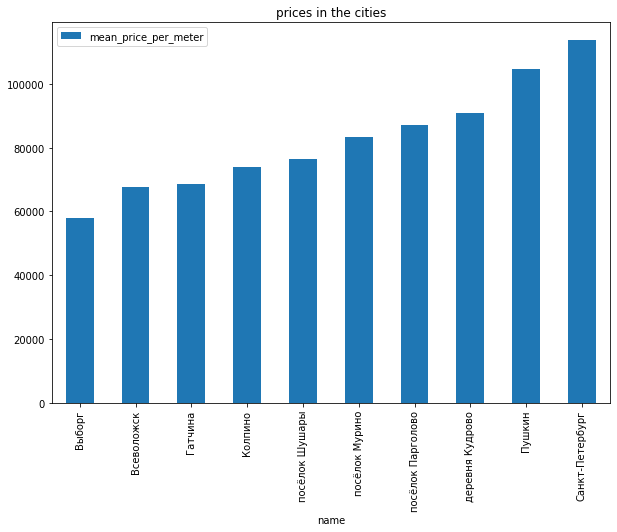

In [42]:
df_top10_locality = pd.DataFrame({'name': ['Санкт-Петербург', 
                                           'посёлок Мурино', 
                                           'посёлок Шушары', 
                                           'Всеволожск', 
                                           'Пушкин', 
                                           'Колпино', 
                                           'посёлок Парголово', 
                                           'Гатчина', 
                                           'деревня Кудрово', 
                                           'Выборг'], 
                                  'mean_price_per_meter': [locality_mean('Санкт-Петербург'),
                                                           locality_mean('посёлок Мурино'),
                                                           locality_mean('посёлок Шушары'),
                                                           locality_mean('Всеволожск'),
                                                           locality_mean('Пушкин'),
                                                           locality_mean('Колпино'),
                                                           locality_mean('посёлок Парголово'),
                                                           locality_mean('Гатчина'),
                                                           locality_mean('деревня Кудрово'),
                                                           locality_mean('Выборг')]})

df_top10_locality = df_top10_locality.sort_values(by='mean_price_per_meter')
df_top10_locality1 = df_top10_locality.set_index('name')
df_top10_locality1.plot(y='mean_price_per_meter', kind='bar', figsize=(10,7))
plt.title('prices in the cities')
plt.show()

Получается, что дешевле всего жилье в Выборге, Всеволожске и Гатчине, а вот дороже всего в Кудрово, Пушкине и Санкт-Петербурге.

### Обработка цнтра Питера

Выделим квартиры в Питере и обработаем их в зависимости от удаленности от центра:

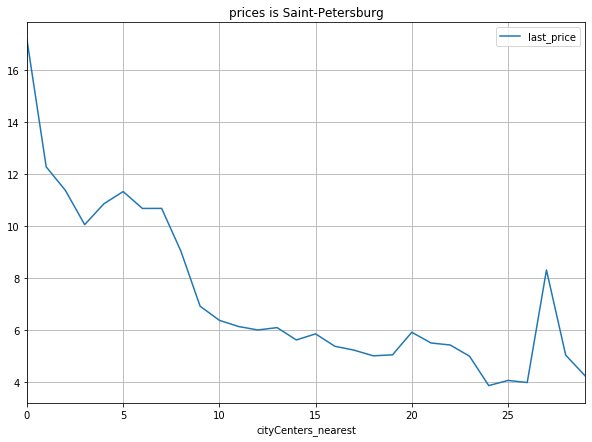

In [43]:
df_clean['cityCenters_nearest'] = df_clean['cityCenters_nearest'].round()
df_clean_SaintP = df_clean.query('locality_name == "Санкт-Петербург"')
SaintP_center_price = df_clean_SaintP.pivot_table(index = 'cityCenters_nearest', 
                                                  values = 'last_price')
SaintP_center_price.plot(y='last_price', 
                         style='-', 
                         grid=True, 
                         figsize=(10,7)) 
plt.title('prices is Saint-Petersburg')
plt.show()

Резкое снижение идет до отметки 3км, дальше идет небольшой рост, а после 5 км плавное снижение, скорее всего ориентировочно на 8–10 км заканчиваются квартиры в центральной зоне, потому что дальше идёт в том числе спад и длительная стагнация стоимости.

### Ценообразование в центре Питера

Для выделенной зоны 9 км изучим следующие параметры: площадь, цену, число комнат, высота потолков. Но сначала сделаем новый срез, который будет удовлетворять условию того, что квартиры находятся в центре.

In [44]:
SaintP_center = df_clean_SaintP.query('cityCenters_nearest < 9')

Построим по следующим параметрам графики сначала для центральной зоны, потом для всего города и сравним полученные результаты

Графики центральной зоны и для всего города:

parametr:  total_area


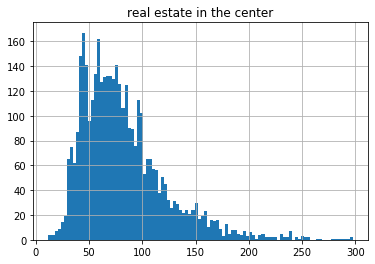

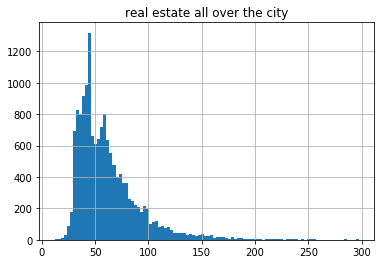

parametr:  last_price


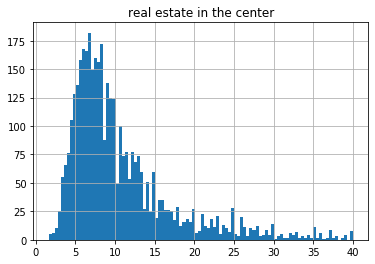

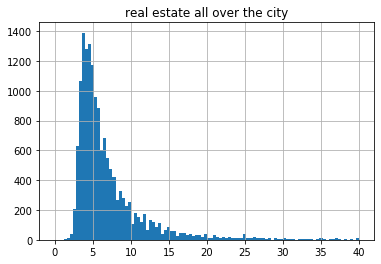

parametr:  rooms


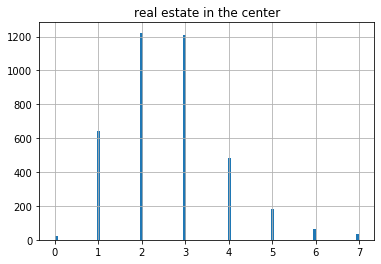

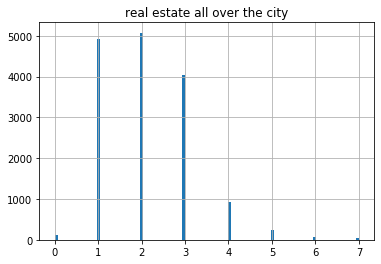

parametr:  ceiling_height


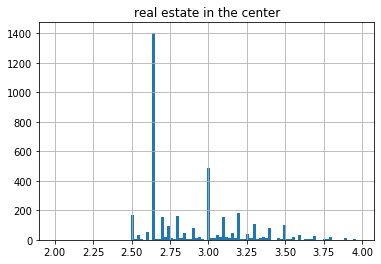

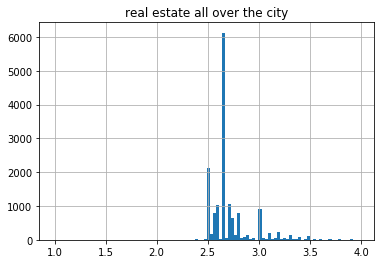

In [45]:
columns3 = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for i in columns3:
    print('parametr: ', i)
    SaintP_center[i].hist(bins=100)
    plt.title('real estate in the center')
    plt.show()
    df_clean_SaintP[i].hist(bins=100)
    plt.title('real estate all over the city')
    plt.show()

Выводы относительно полученных данных:

Однозначно можно сделать вывод, что в центре в основном продаются квартиры с большей площадью, нежеле в остальных районах города. 

Сильно бросается в глаза тот факт, что квартиры в центре на порядок дороже, также можно отметить, что в остальных районах города идет гладкий, но тем неменее резкий спуск, а в центральном районе все же много дорогих квартир, и хоть спуск и наблюдается, но он совсем не резкий, а ближе к пологому.

В центре в основном продают двух-трехкомнатные квартриры, а вот в остальных районах наоборот более распространена продажа однушек.

А вот высота потолков в целом схожа, однако в центре гораздо чаще можно встретить квартиры с более высокими потолками, это связанно с тем, что в центре много исторических зданий, где очень высокие потолки, а в остальных районах чаще всего продаются квартиры в новостройках, где пытабтся уложиться в ГОСТы и не заморачиваются насчёт комфортабельности.

Проверим как влияют число комнат, этаж, удалённость от центра, дата размещения объявления на ценообразование в центре.

                     cityCenters_nearest     floor  last_price     rooms
cityCenters_nearest             1.000000  0.278444   -0.094608 -0.215713
floor                           0.278444  1.000000    0.161547 -0.076297
last_price                     -0.094608  0.161547    1.000000  0.467838
rooms                          -0.215713 -0.076297    0.467838  1.000000


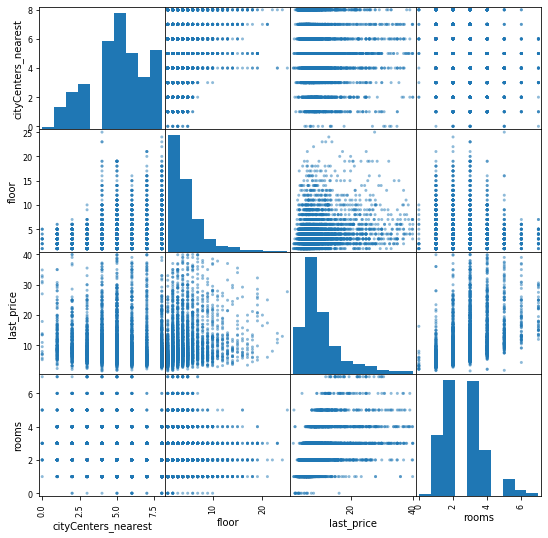

In [47]:
stat_center = SaintP_center.pivot_table(
    index = SaintP_center.index, values=['last_price', 
                                         'first_day_exposition', 
                                         'floor', 'rooms', 
                                         'cityCenters_nearest']
)
print(stat_center.corr())
pd.plotting.scatter_matrix(stat_center, figsize=(9, 9))
plt.show()

В целом влияние оказывается примерно такое же, как и по области. 

## Общий вывод

Проведенный анализ помог найти основные факторы влияние на ценообразование. Также были выделенны районы, где четко указывалось сколько в среднем стоит квадратный метр, где цены минимальны, где максимальны. Для Санкт-Петербурга был проведен отдельный анализ для выявления квартир в цнтре и их основных отличий от недвижимоти в других районах. 